<a href="https://colab.research.google.com/github/blueberrylazjy/pytorch/blob/main/DataLoader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from torchvision.datasets import MNIST
from torchvision import transforms

img_size=28 

mnist_train = MNIST("./data", train=True, download=True, transform=transforms.ToTensor())
mnist_test = MNIST("./data", train=False, download=True, transform=transforms.ToTensor())
                                                                              #transfer to Tensor
print("訓練データの数:", len(mnist_train),"テストデータの数:", len(mnist_test))

訓練データの数: 60000 テストデータの数: 10000


In [21]:
from torch.utils.data import DataLoader

#set up DataLoad

batch_size=256 #set up batchsize
train_loader = DataLoader(mnist_train,
                          batch_size=batch_size,
                          shuffle=True)
print(train_loader)
                          #データをシャッフルしてミニバッチを取り出すかどうか設定する
                          #。訓練データにはTrue、テストデータにはFalse
test_loader = DataLoader(mnist_train,
                          batch_size=batch_size,
                          shuffle=False)

In [22]:
import torch.nn as nn
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 =nn.Linear(img_size*img_size, 1024)
    #全結合層
    self.fc2=nn.Linear(1024, 512)
    self.fc3=nn.Linear(512,10)
    self.relu=nn.ReLU()
  def forward(self,x):
    x = x.view(-1, img_size*img_size)
    #（バッチサイズ，入力の数）：画像を1次元に変換（view(-1)）
    x=self.relu(self.fc1(x))
    x=self.relu(self.fc2(x))
    x=self.fc3(x)
    return x

net = Net()
net.cuda() #use GPU
print(net)


Net(
  (fc1): Linear(in_features=784, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (relu): ReLU()
)


In [26]:
from torch import optim

loss_fnc = nn.CrossEntropyLoss()

#SGD
optimizer = optim.SGD(net.parameters(), lr=0.01)

record_loss_train=[]
record_loss_test=[]

for i in range(10):
  net.train() #training mode
  loss_train = 0
  for j, (x,g) in enumerate(train_loader):
    #take out mini batch
    x,g=x.cuda(), g.cuda() # use GPU
    y=net(x)
    loss = loss_fnc(y,g)
    loss_train += loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  loss_train /= j+1
  record_loss_train.append(loss_train)

  net.eval #evaluating mode
  loss_test = 0
  for j,(x,t) in enumerate(test_loader):
    x, t = x.cuda(), t.cuda()
    y = net(x)
    loss =loss_fnc(y,t)
    loss_test += loss.item()
  loss_test /= j+1
  record_loss_test.append(loss_test)

  if i%1 ==0:
    print("Epoch:", i, "Loss_train:", loss_train, "Loss_test:", loss_test)


Epoch: 0 Loss_train: 0.7378931991597439 Loss_test: 0.6337980706641014
Epoch: 1 Loss_train: 0.5727866626800375 Loss_test: 0.5221386797250586
Epoch: 2 Loss_train: 0.4888368585008256 Loss_test: 0.4599152682943547
Epoch: 3 Loss_train: 0.4391482729861077 Loss_test: 0.42077387679130474
Epoch: 4 Loss_train: 0.406534913626123 Loss_test: 0.39447675372691865
Epoch: 5 Loss_train: 0.38303145106802594 Loss_test: 0.37277958529426697
Epoch: 6 Loss_train: 0.3651946360760547 Loss_test: 0.3577494816577181
Epoch: 7 Loss_train: 0.3507736131865927 Loss_test: 0.34409240249623646
Epoch: 8 Loss_train: 0.33865877966931524 Loss_test: 0.33292531624753424
Epoch: 9 Loss_train: 0.3281942990866113 Loss_test: 0.32368010152527626


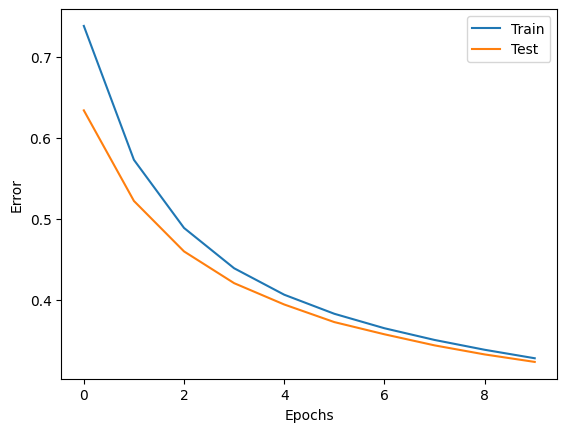

In [27]:
import matplotlib.pyplot as plt
plt.plot(range(len(record_loss_train)), record_loss_train, label="Train")
plt.plot(range(len(record_loss_test)), record_loss_test, label="Test")
plt.legend()

plt.xlabel("Epochs")
plt.ylabel("Error")

plt.show()

